In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

In [499]:
#Import Censored Data
censored_df=pd.read_json('../ExtractedData/input_withheldtweets.json', lines=True)

In [500]:
#import mostly not censored data
uncensored_df=pd.read_json('../Data/Mostly_Not_Censored.json', lines=True)

In [501]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [502]:
print("censored", df["withheld_in_countries"].notnull().sum())
print("uncensored", df["withheld_in_countries"].isnull().sum())

censored 2062
uncensored 2381


In [503]:
df.loc[df["withheld_in_countries"].notnull(),"withheld_in_countries",]=0
df.loc[df["withheld_in_countries"].isnull(),"withheld_in_countries",]=1

In [504]:
df_x=df["text"]
df_y=df["withheld_in_countries"]

In [505]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [506]:
#cv = TfidfVectorizer(use_idf=True, stop_words='english')  # worse performance
cv = CountVectorizer(min_df=1, stop_words='english')

In [507]:
x_traincv=cv.fit_transform(x_train)
x_testcv=cv.transform(x_test)
x_traincv.shape

(3554, 14641)

In [508]:
mnb = MultinomialNB()

In [509]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [510]:
mnb.fit(x_traincv,y_train)

MultinomialNB()

In [511]:
predictions=mnb.predict(x_testcv)

In [512]:
confusion_matrix(y_test, predictions)

array([[411,  11],
       [ 86, 381]], dtype=int64)

In [513]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       422
           1       0.97      0.82      0.89       467

    accuracy                           0.89       889
   macro avg       0.90      0.89      0.89       889
weighted avg       0.90      0.89      0.89       889



In [514]:
mnb.score(x_testcv, y_test)

0.890888638920135

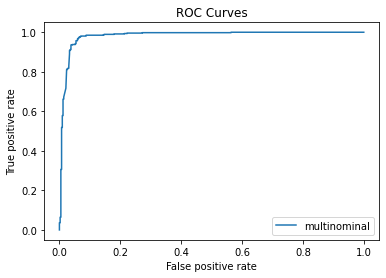

In [517]:
scores = mnb.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['multinominal'])
plt.show()